<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_Basic-machineLearning/hw1_predictionOfSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# hw1 연차에따른 연봉 예측하기 ( Linear regression)

## Colab에서 Kaggle 데이터셋 연동하기

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'username' # username
os.environ['KAGGLE_KEY'] = 'key' # key

## 연봉 데이터셋 다운로드
데이터셋: https://www.kaggle.com/rsadiq/salary

In [2]:
!kaggle datasets download -d rsadiq/salary

salary.zip: Skipping, found more recently modified local copy (use --force to force download)


데이터셋 압축해제

In [3]:
!unzip /content/salary.zip

Archive:  /content/salary.zip
replace Salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary.csv              


## 연봉 데이터 예측
연차로 연봉 예측하기

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

데이터셋 로드

In [5]:
df=pd.read_csv('Salary.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
print(df.shape)

(35, 2)


데이터셋 살짝 살펴보기

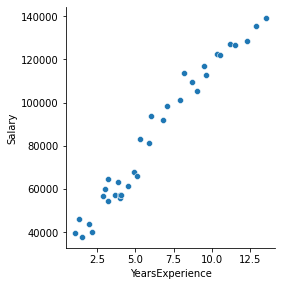

In [7]:
sns.pairplot(df, x_vars=['YearsExperience'], y_vars=['Salary'], height=4)

데이터셋 가공

In [8]:
x_data = np.array(df[['YearsExperience']], dtype=np.float32)
y_data = np.array(df['Salary'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35,)


In [9]:
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(35, 1)
(35, 1)


데이터셋 분할
- 학습데이터 80%, 검증 데이터 20%
- 이 코드는 학습용이라 테스트 데이터는 논외

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28, 1) (7, 1)
(28, 1) (7, 1)


학습

In [11]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 359ms/step - loss: 8665593856.0000 - val_loss: 144185744.0000
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 520543744.0000 - val_loss: 311871392.0000
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 218535504.0000 - val_loss: 245431376.0000
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 205775952.0000 - val_loss: 254776272.0000
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 203698512.0000 - val_loss: 250787728.0000
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 202030160.0000 - val_loss: 249412144.0000
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 200391904.0000 - val_loss: 247558544.0000
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 198769648.0000 - val_loss: 245816320.0000
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 197162672.0000

검증 데이터로 예측하기

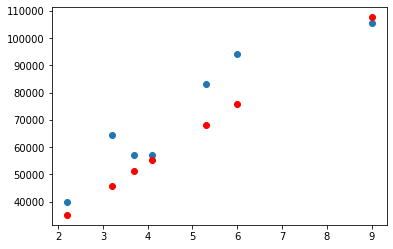

In [12]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()